<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

##Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as T
import cv2
import torch.nn as nn

##Numpy

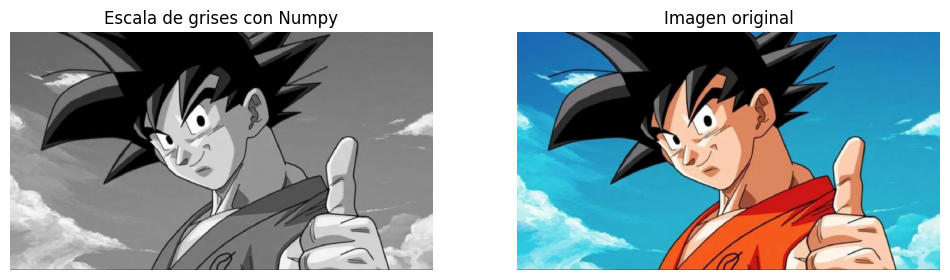

In [ ]:
#Cargamos la imagen con PIL luego usamos Numpy
imapil = Image.open('goku.jpg')  #Abrimos la imagen
imanp = np.array(imapil) #La convertimos en un array para trabajarla con Numpy

#Convertimos a escala de grises
grisnp = np.mean(imanp, axis=2).astype(np.uint8)

#Mostramos la imagen en escala de grises
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(grisnp, cmap='gray')
plt.title("Escala de grises con Numpy")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imapil)
plt.title("Imagen original")
plt.axis('off')
plt.show()


#Guardamos imagen
Image.fromarray(grisnp).save('gokugrisNP.jpg')

##Pytorch

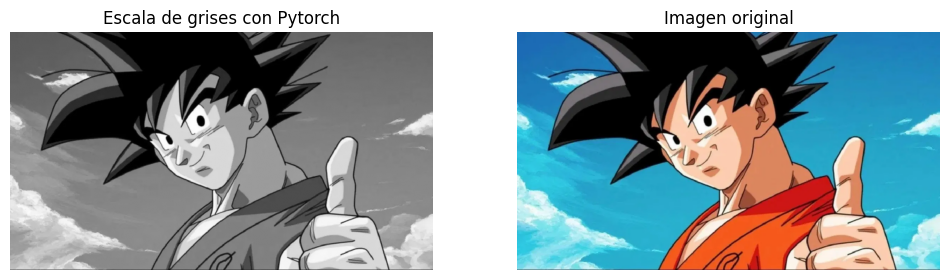

In [ ]:
#Cargamos imagen con PIL y convertimos usando torch
imaTensor = T.ToTensor()(imapil)

#Convertimos a escala de grises con la formula para escala de grises
#0.299 * R + 0.587 * G + 0.114 * B
grisTorch = (0.299 * imaTensor[0] +
              0.587 * imaTensor[1] +
              0.114 * imaTensor[2])

#Mostramos la imagen en escala de grises
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(grisTorch, cmap='gray')
plt.title("Escala de grises con Pytorch")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imapil)
plt.title("Imagen original")
plt.axis('off')
plt.show()

#Guardamos la imagen usando np, si bien la transformación la hice usando torch, para el guardado use np
grisTSave = (grisTorch.numpy() * 255).astype(np.uint8)
Image.fromarray(grisTSave).save('gokugrisTorch.jpg')


##OpenCV

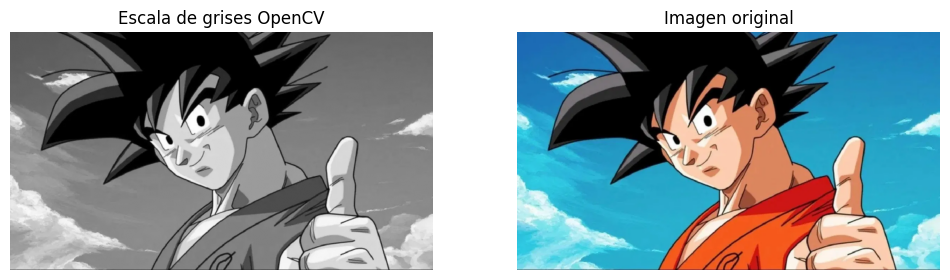

True

In [ ]:
import cv2

#Cargamos la imagen con OpenCV
imaCV = cv2.imread('goku.jpg')
grisCV = cv2.cvtColor(imaCV, cv2.COLOR_BGR2GRAY)

#Mostramos la imagen en escala de grises
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(grisCV, cmap='gray')
plt.title("Escala de grises OpenCV")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imapil)
plt.title("Imagen original")
plt.axis('off')

plt.show()

#Guardamos la imagen
cv2.imwrite('gokugrisCV.jpg', grisCV)


## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

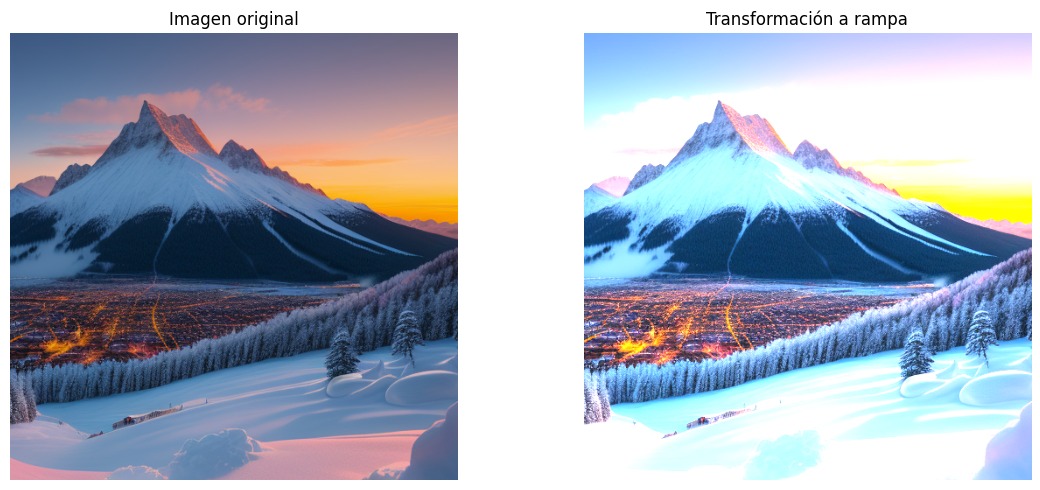

In [47]:
#Cargamos la imagen como un array
imagePng = np.array(Image.open("image.png"))  # (H, W, 3)

#Parametros de transformación
threshold = 128 #Umbral
pendiente = 2 #Pendiente de la rampa


#Convertimos a float para evitar saturación
imageFloat = imagePng.astype(np.float32)

#Multiplicamos por la pendiente para que sea una rampa
ImageRampa = imageFloat * pendiente

#Aplicamos la saturación y evitamos valores fuera de 0 a 255
imageSatur = np.clip(ImageRampa, 0, 255)

#Convertimos de nuevo a uint para evitar errores
imageTransf = imageSatur.astype(np.uint8)

#Comparamos las imagenes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagePng)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imageTransf)
plt.title("Transformación a rampa")
plt.axis("off")

plt.tight_layout()

plt.show()


#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



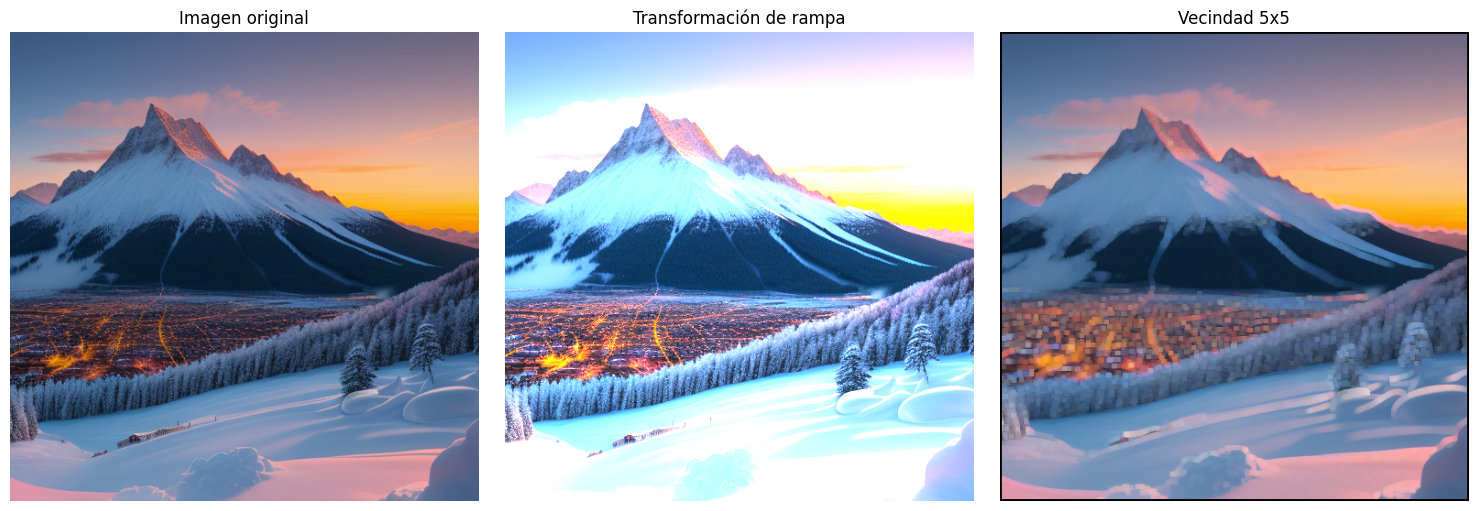

In [ ]:
def vecindad(imagePng):
    """
    Reemplaza los pixeles por el tamaño maximo de los vecinos

    Parametros:
    Tamaño: Define el tamaño de la vecindad(5x5)
    Offset: para tener el pixel central, es 2 ya que es la mitad aproximada al entero de "abajo"
    """
    Tamaño = 5
    offset = 2
    vecinos = np.zeros_like(imagePng) #Borde en negro

    for i in range(offset, imagePng.shape[0] - offset):
        for j in range(offset, imagePng.shape[1] - offset):
            vecindad = imagePng[i - offset:i + offset + 1, j - offset:j + offset + 1]
            highV = np.max(vecindad, axis=(0, 1)) #
            vecinos[i, j] = highV #Asignamos el maximo valor al pixel central

    return vecinos

# Aplicamos la transformación de vecindad
imageVecindad = vecindad(imagePng)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagePng)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imageTransf)
plt.title("Transformación de rampa")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imageVecindad)
plt.title("Vecindad 5x5")
plt.axis("off")

plt.tight_layout()
plt.show()


#### 2.3 Aplica transformación de intensidad
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

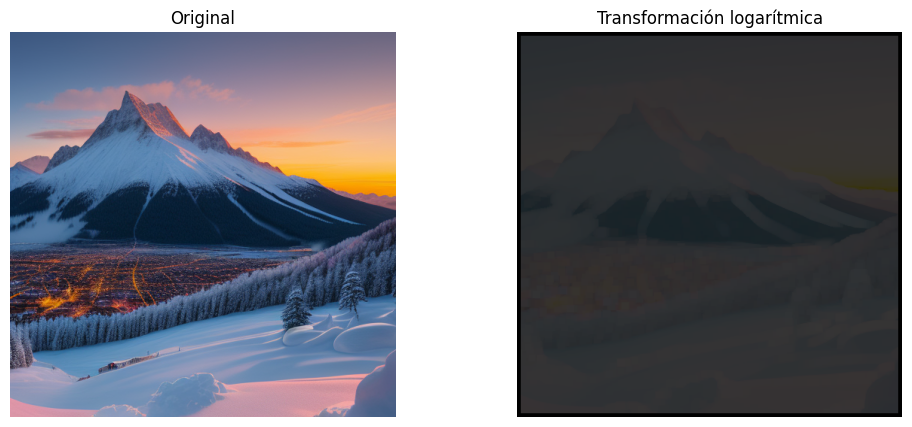

In [ ]:

def transformacionS(image, c=10):
    """
    Aplicamos S = c * log(1 + r)

    Parametros:
    tamaño: tamaño de la vecindad (10x10)
    offset: para ayudarnos a encontrar el centro
    """
    tamaño = 10
    offset = tamaño // 2 # en este caso es par asi que no hay problema en solo dividir en 2
    VecindadS = np.zeros_like(image, dtype=np.float32)

    for i in range(offset, image.shape[0] - offset):
        for j in range(offset, image.shape[1] - offset):
            vecindad = image[i - offset:i + offset, j - offset:j + offset]  # 10x10

            #Calculamos valor r usando el maximo
            r = np.max(vecindad, axis=(0, 1)).astype(np.float32)

            #Aplicamos la transformada
            S = c * np.log1p(r)  # log1p = log(1 + r)

            #Saturamos con 255 como maximo
            S = np.clip(S, 0, 255)
            VecindadS[i, j] = S
            finalS = VecindadS.astype(np.uint8)

    return finalS


#Usamos la función
imageS = transformacionS(imagePng, c=10)

#Mostramos los resultados
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(imagePng)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imageS)
plt.title("Transformación logarítmica")
plt.axis('off')
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

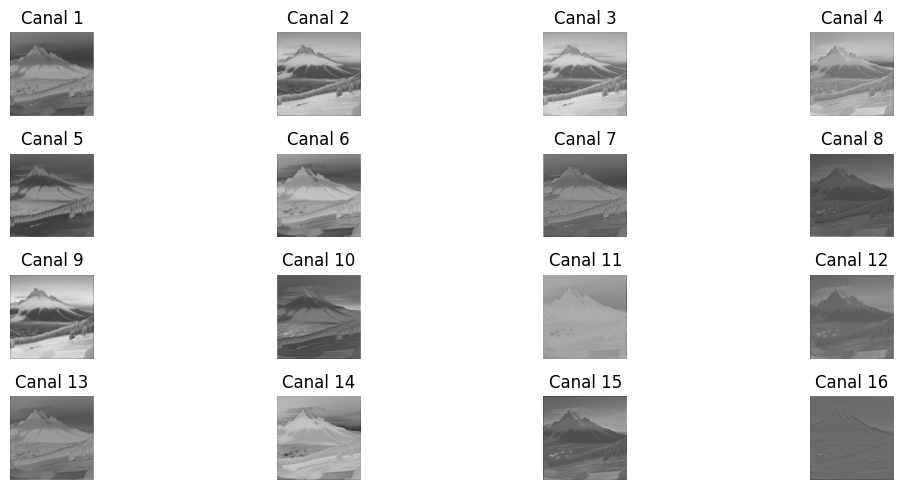

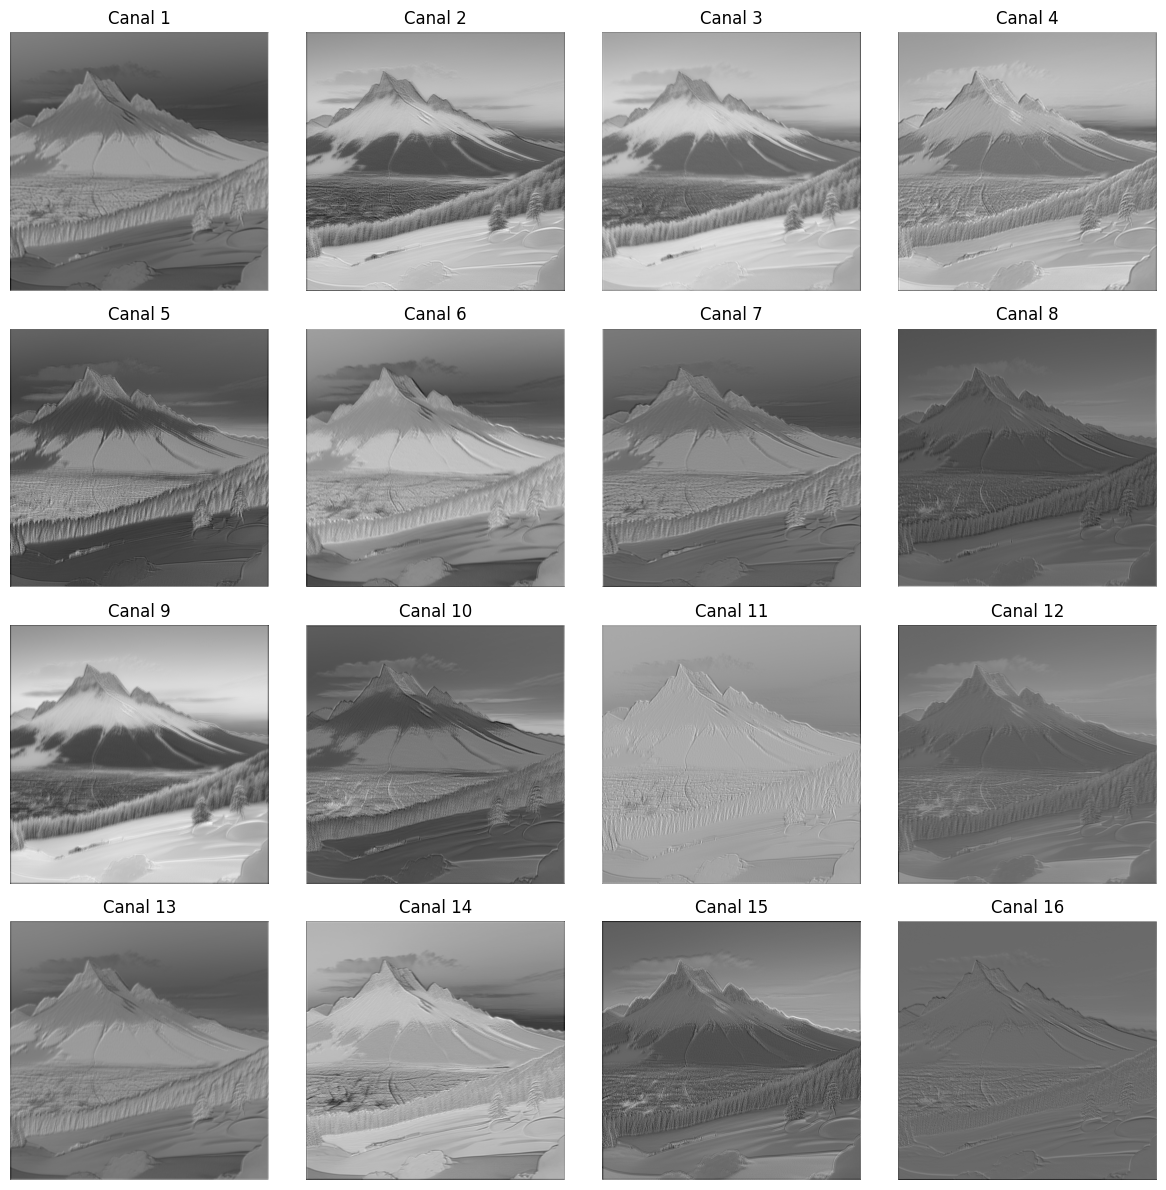

In [ ]:
#Trabajos la imagen con torch usando tensor
aTensor = T.ToTensor()
imageTensor = aTensor(imagePng)
imagePngT = imageTensor.unsqueeze(0) #fijamos el canal de batch

#Definimos los valores para la convolucion (Canales de entrada, Canales de salida, kernel, stride y padding)
C1 = nn.Conv2d(3, 8, 3, 1, 1)
C2 = nn.Conv2d(8, 16, 3, 1, 1)
C3 = nn.Conv2d(16, 16, 3, 1, 1)

#Aplicamos la convolución
R1 = C1(imagePngT)
R2 = C2(R1)
R3 = C3(R2)


fig, axes = plt.subplots(4, 4, figsize=(12, 5))
axes = axes.flatten()

for i in range(16):
    channel_img = R3[0, i].detach().numpy()  #extraemos canal i del batch
    axes[i].imshow(channel_img, cmap='gray')
    axes[i].set_title(f'Canal {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#Quitamos el batch
R3 = R3.squeeze(0)

#Preparamos la figura para mostrar los 16 canales
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i in range(16):
    #Convertimos a numpy para plotear
    plotnp = R3[i].detach().numpy()
    axes[i].imshow(plotnp, cmap='gray')
    axes[i].set_title(f'Parche {i+1}')
    axes[i].axis('off')
plt.tight_layout()

plt.show()








## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


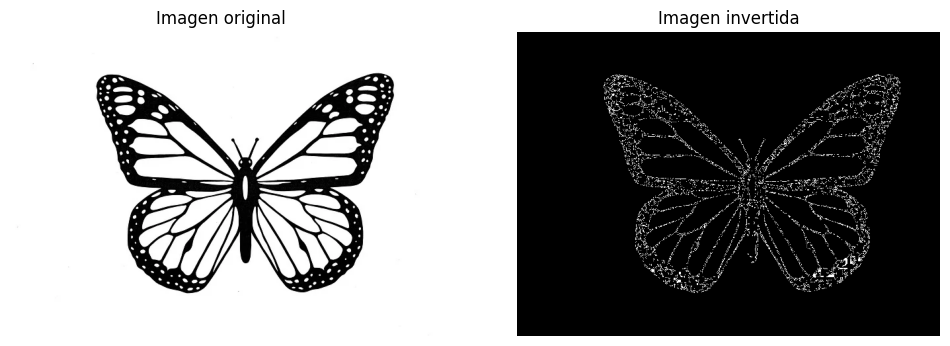

In [ ]:
#llamamos la foto
butter = cv2.imread("mariposabinaria.png") #Para ahorrar codigo use cv en esta parte, bien podria haber usado image.open al igual que al inicio y luego aplicar np.array

#Invertimos la imagen binaria
imageInv = np.where(butter == 0, 255, 0).astype(np.uint8)
#np.where al detectar un 0 lo convierte a 255 y los otros casos se volveran 0, ya que solo tenemos 0 y 255, es claro que el 255 se volvera 0

#Graficamos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(butter, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Imagen invertida")
plt.imshow(imageInv, cmap='gray')
plt.axis('off')

plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



##Para Pytorch

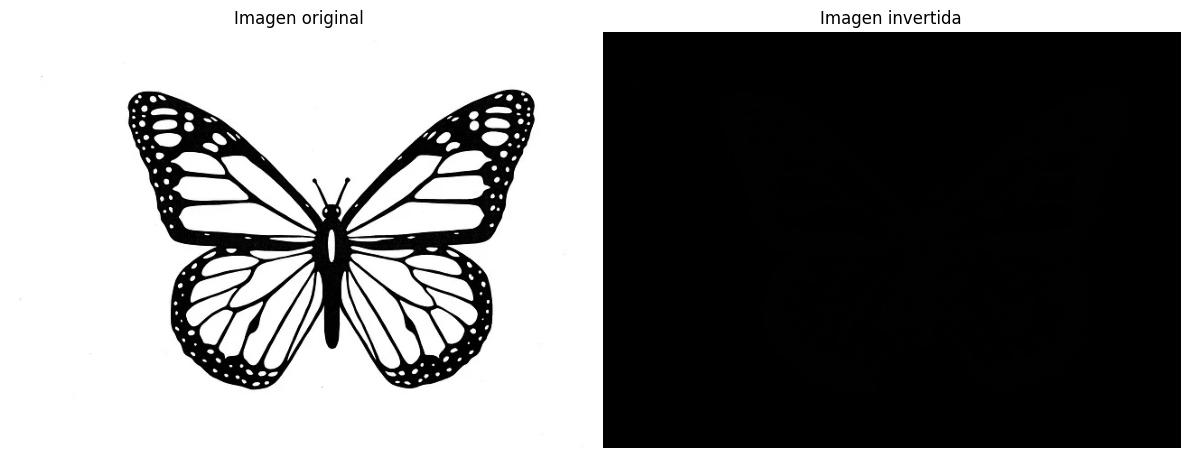

In [ ]:
#convertimos la imagen a tensor
butterTorch = T.ToTensor()(butter).squeeze()

#Ya que solo tiene blanco y negro solo tiene 2 canales
butterTorch.shape[0]
butterTorch.shape[1]

#Invertimosla imagen
imageInvTorch = torch.where(butterTorch == 1, torch.tensor(0), torch.tensor(1)) #Al ser dos canales, basta con intercambiarlos entre ellos para la inversión

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(butter, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Imagen invertida")
plt.imshow(imageInvTorch.permute(1, 2, 0), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

##Para OpenCV

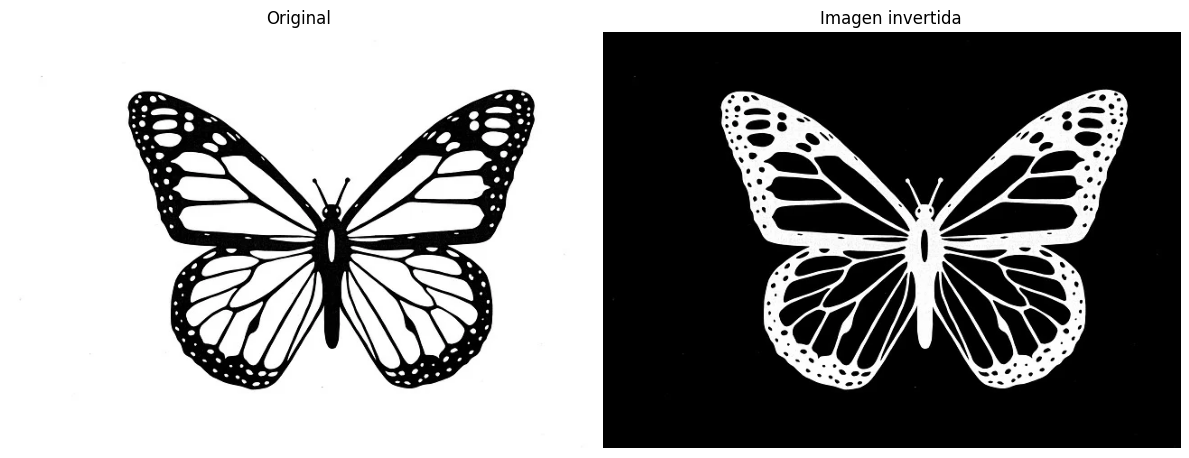

In [ ]:
#invertimos con openCV
imageINVCV = cv2.bitwise_not(butter)

# Mostrar resultado
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(butter, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imageINVCV, cmap='gray')
plt.title("Imagen invertida")
plt.axis('off')

plt.tight_layout()
plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

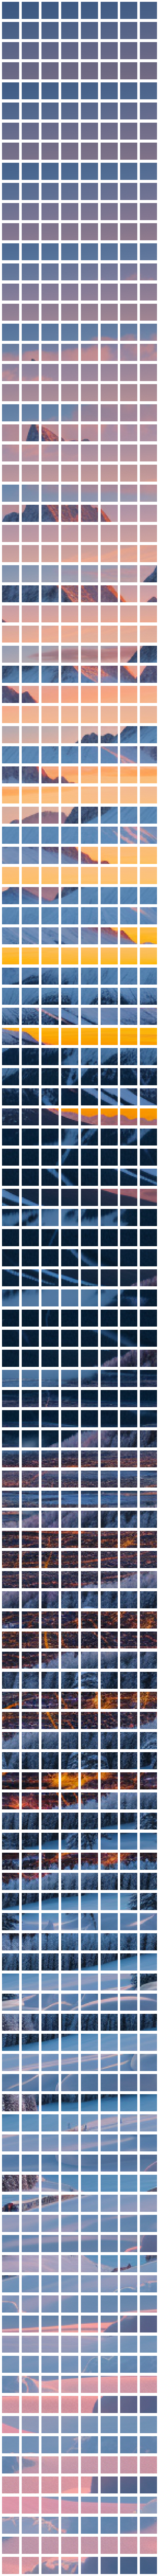

In [ ]:
#utilizare la imagen entregada por el profesor

def parchar(Nieve, size=16):
    """
    Divide una imagen RGB usando parches

    Parametros:
    size: Tamaño de cada parche
    """
    #Calculamos dimensiones de la imagen y cantidad de canales que deberia ser 3 ya que usamos RGB
    h, w, c = Nieve.shape
    #Creamos la lista para parches
    parches = []

    #Hacemos los recortes para nuestros parches
    for i in range(0, h, size):
        for j in range(0, w, size):
            parche = Nieve[i:i+size, j:j+size, :]
            if parche.shape[0] == size and parche.shape[1] == size:
                parches.append(parche)

    return parches

def verParches(patches):
    """
    Muestra los parches
    """
    cantidadP = len(parches) #Cantidad de parches
    columnas = min(cantidadP, 8) #Defino 16 como el limite ya que es el tamaño de mis parches
    filas = (cantidadP + columnas - 1) // columnas

    #Comenzamos a graficar
    fig, axs = plt.subplots(filas, columnas, figsize=(columnas, filas))
    axs = axs.flatten()

    for i in range(len(parches)):
        axs[i].imshow(parches[i])
        axs[i].axis('off')

    for i in range(len(parches), len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()


#Utilizamos las funciones
parches = parchar(imagePng, size=16)
verParches(parches)


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.


In [ ]:
#[pytorch] https://docs.pytorch.org/vision/0.9/transforms.html